# Loading in Data and Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('taper_comparisons.csv')

# Violin Plot Visualization (Specify window length and TW of desired visualization, assuming they've been generated)

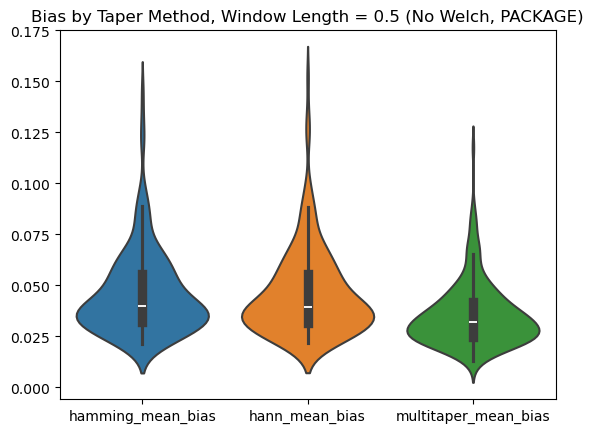

In [15]:
window_length = 0.5
TW = 4
plt.title(f"Bias by Taper Method, Window Length = {window_length} (No Welch, PACKAGE)")
sns.violinplot(data=df[(df['window']==window_length) & (df['TW'] == TW)].drop(columns=['window', 'TW']), linewidth=1.5)
plt.savefig(f'{window_length}s_multitaper_{TW*2-1}_singletaper_no_welch_bias.png')

# Statistical Computation

In [16]:
df_mean = df.groupby(['window', 'TW']).mean().reset_index()
df_std = df.groupby(['window', 'TW']).std().reset_index()

threshold = 0.005
df_mean['multitaper_error'] = (df_mean['multitaper_mean_bias'] - df_mean['hamming_mean_bias'])
df_mean['multitaper_better?'] = df_mean['multitaper_error'] < threshold

df_std['multitaper_std_delta'] = (df_std['multitaper_mean_bias'] - df_std['hamming_mean_bias'])
df_std['multitaper_better?'] = df_std['multitaper_std_delta'] < threshold
df_std

,window,TW,hamming_mean_bias,hann_mean_bias,multitaper_mean_bias,multitaper_std_delta,multitaper_better?
0,0.01,1.0,0.065311,0.065978,0.062991,-0.002320,True
1,0.01,4.0,0.065311,0.065978,0.059806,-0.005504,True
2,0.05,1.0,0.055852,0.057248,0.049655,-0.006198,True
3,0.05,4.0,0.055852,0.057248,0.042964,-0.012889,True
4,0.10,1.0,0.041103,0.042630,0.035003,-0.006100,True
5,0.10,4.0,0.041103,0.042630,0.027731,-0.013372,True
6,0.50,1.0,0.020622,0.021327,0.017616,-0.003007,True
7,0.50,4.0,0.020622,0.021327,0.015372,-0.005250,True
